# **ĐỒ ÁN GIỮA KÌ - TRỰC QUAN HÓA DỮ LIỆU**

---

## **Thông tin nhóm**
- #### Nhóm 9
- #### Thành viên nhóm:

    |   MSSV   | HỌ VÀ TÊN               |
    |:--------:|:------------------------|
    | 21127399 | Nguyễn Đỗ Nguyên Phương |
    | 22127081 | Huỳnh Lê Hải Dương      |
    | 22127117 | Lý Liên Hoa             |
    | 22127352 | Võ Anh Quân             |
    | 22127358 | Phạm Văn Quyến          |

---

## **Giới thiệu đồ án**
Bệnh tim mạch là một trong những nguyên nhân hàng đầu gây tử vong trên thế giới, trong đó đau tim (heart attack) là một tình trạng nghiêm trọng. Dự án này tập trung vào việc phân tích dữ liệu liên quan đến nguy cơ đau tim dựa trên dataset [Heart Attack Prediction in United States](https://www.kaggle.com/datasets/ankushpanday2/heart-attack-prediction-in-united-states/data?fbclid=IwZXh0bgNhZW0CMTEAAR0Zu-7XwdYN0O6wjPHv9WwsyYfd0hKNYf2avMuCTFQ0L7ZpWZNemvngpTI_aem_k-7lMUwF3cQjxsToxqIgOg) từ Kaggle. 

Mục tiêu chính là phân tích, khám phá và hiểu rõ các yếu tố nào có ảnh hưởng lớn đến nguy cơ đau tim, từ đó cung cấp những thông tin hữu ích cho y tế và sức khỏe cộng đồng.

---

## **1. Thu thập dữ liệu**

### **1.1. Về dataset**
Bộ dữ liệu này chứa thông tin về các yếu tố sức khỏe và lối sống khác nhau có thể ảnh hưởng đến các cơn đau tim ở Hoa Kỳ. Nó bao gồm các chi tiết như tuổi tác, cholesterol, huyết áp và thói quen hút thuốc, cùng với kết quả là liệu một cơn đau tim có xảy ra hay không. Mục tiêu là giúp xác định các rủi ro và xu hướng tiềm năng có thể dẫn đến nhận thức và phòng ngừa sức khỏe tim mạch tốt hơn.

### **1.2. Giấy phép**
- [**CC0: Public Domain**](https://creativecommons.org/publicdomain/zero/1.0/)
- Không có bản quyền.

### **1.3. Tác giả đã thu thập data như thế nào?**
Tác giả đã sử dụng phương pháp **cào web** để cào trên 3 trang web dữ liệu khác nhau. Kết quả cuối cùng, bộ dataset có tổng cộng **32 thuộc tính** khác nhau có thể ảnh hưởng đến bệnh tim mạch (bao gồm Gender, Cholesterol, BloodPressure, HeartRate, ...) và **372,974 bản ghi**.

---

## **2. Đọc dữ liệu**

Kích thước bộ dữ liệu:
- Số lượng dòng (bản ghi): 372974
- Số lượng cột (thuộc tính): 32
5 dòng đầu tiên của bộ dữ liệu:
Số lượng dòng bị trùng: 0
Tổng dữ liệu thiếu ở mỗi cột:

Age                      0
Gender                   0
Cholesterol              0
BloodPressure            0
HeartRate                0
BMI                      0
Smoker                   0
Diabetes                 0
Hypertension             0
FamilyHistory            0
PhysicalActivity         0
AlcoholConsumption       0
Diet                     0
StressLevel              0
Ethnicity                0
Income                   0
EducationLevel           0
Medication               0
ChestPainType            0
ECGResults               0
MaxHeartRate             0
ST_Depression            0
ExerciseInducedAngina    0
Slope                    0
NumberOfMajorVessels     0
Thalassemia              0
PreviousHeartAttack      0
StrokeHistory            0
Residence                0
EmploymentStatus         0
MaritalStatu

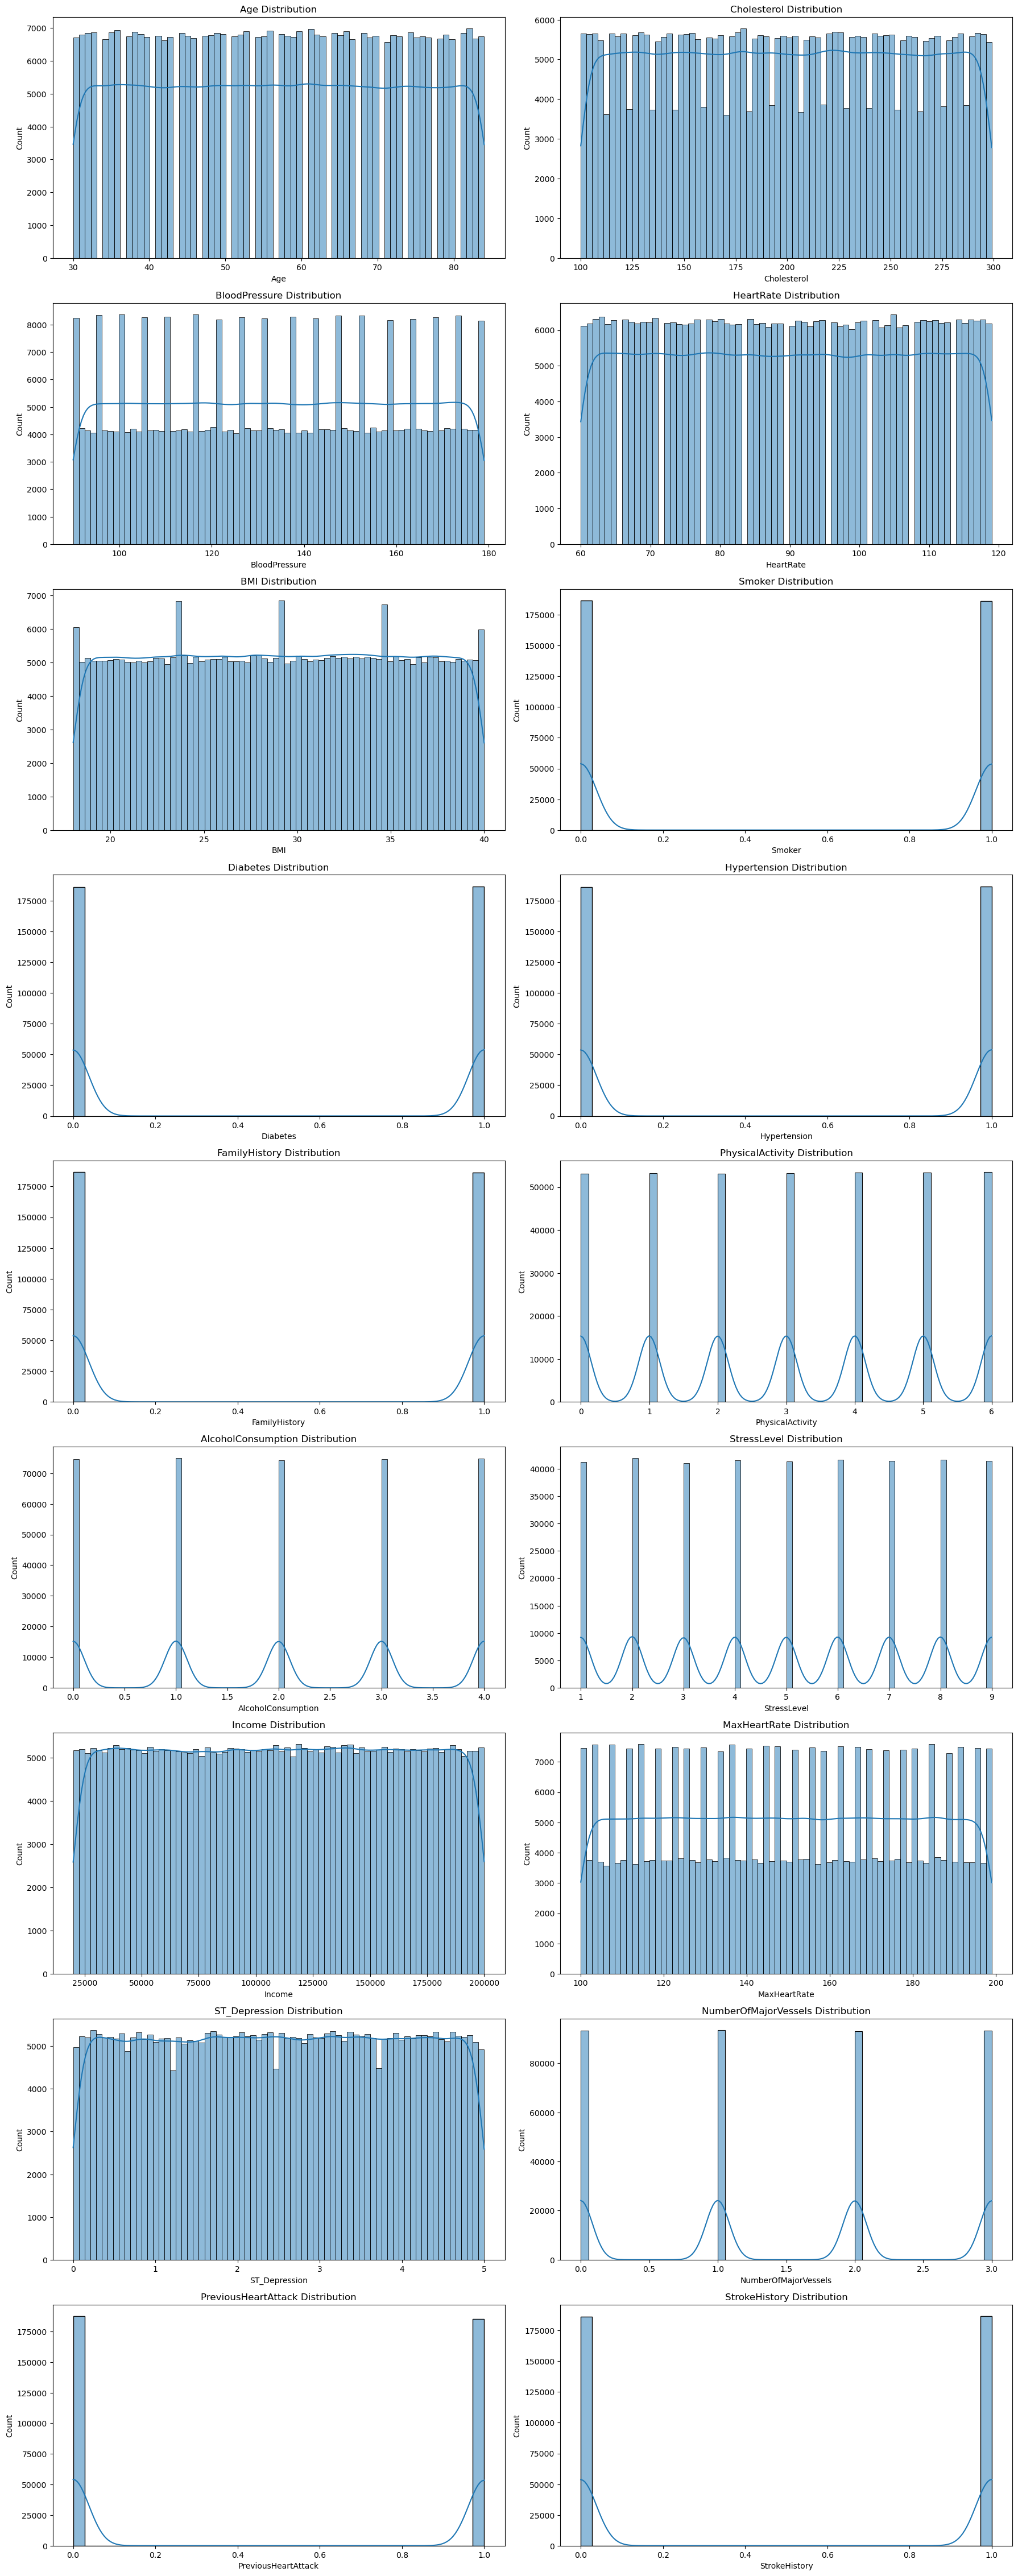

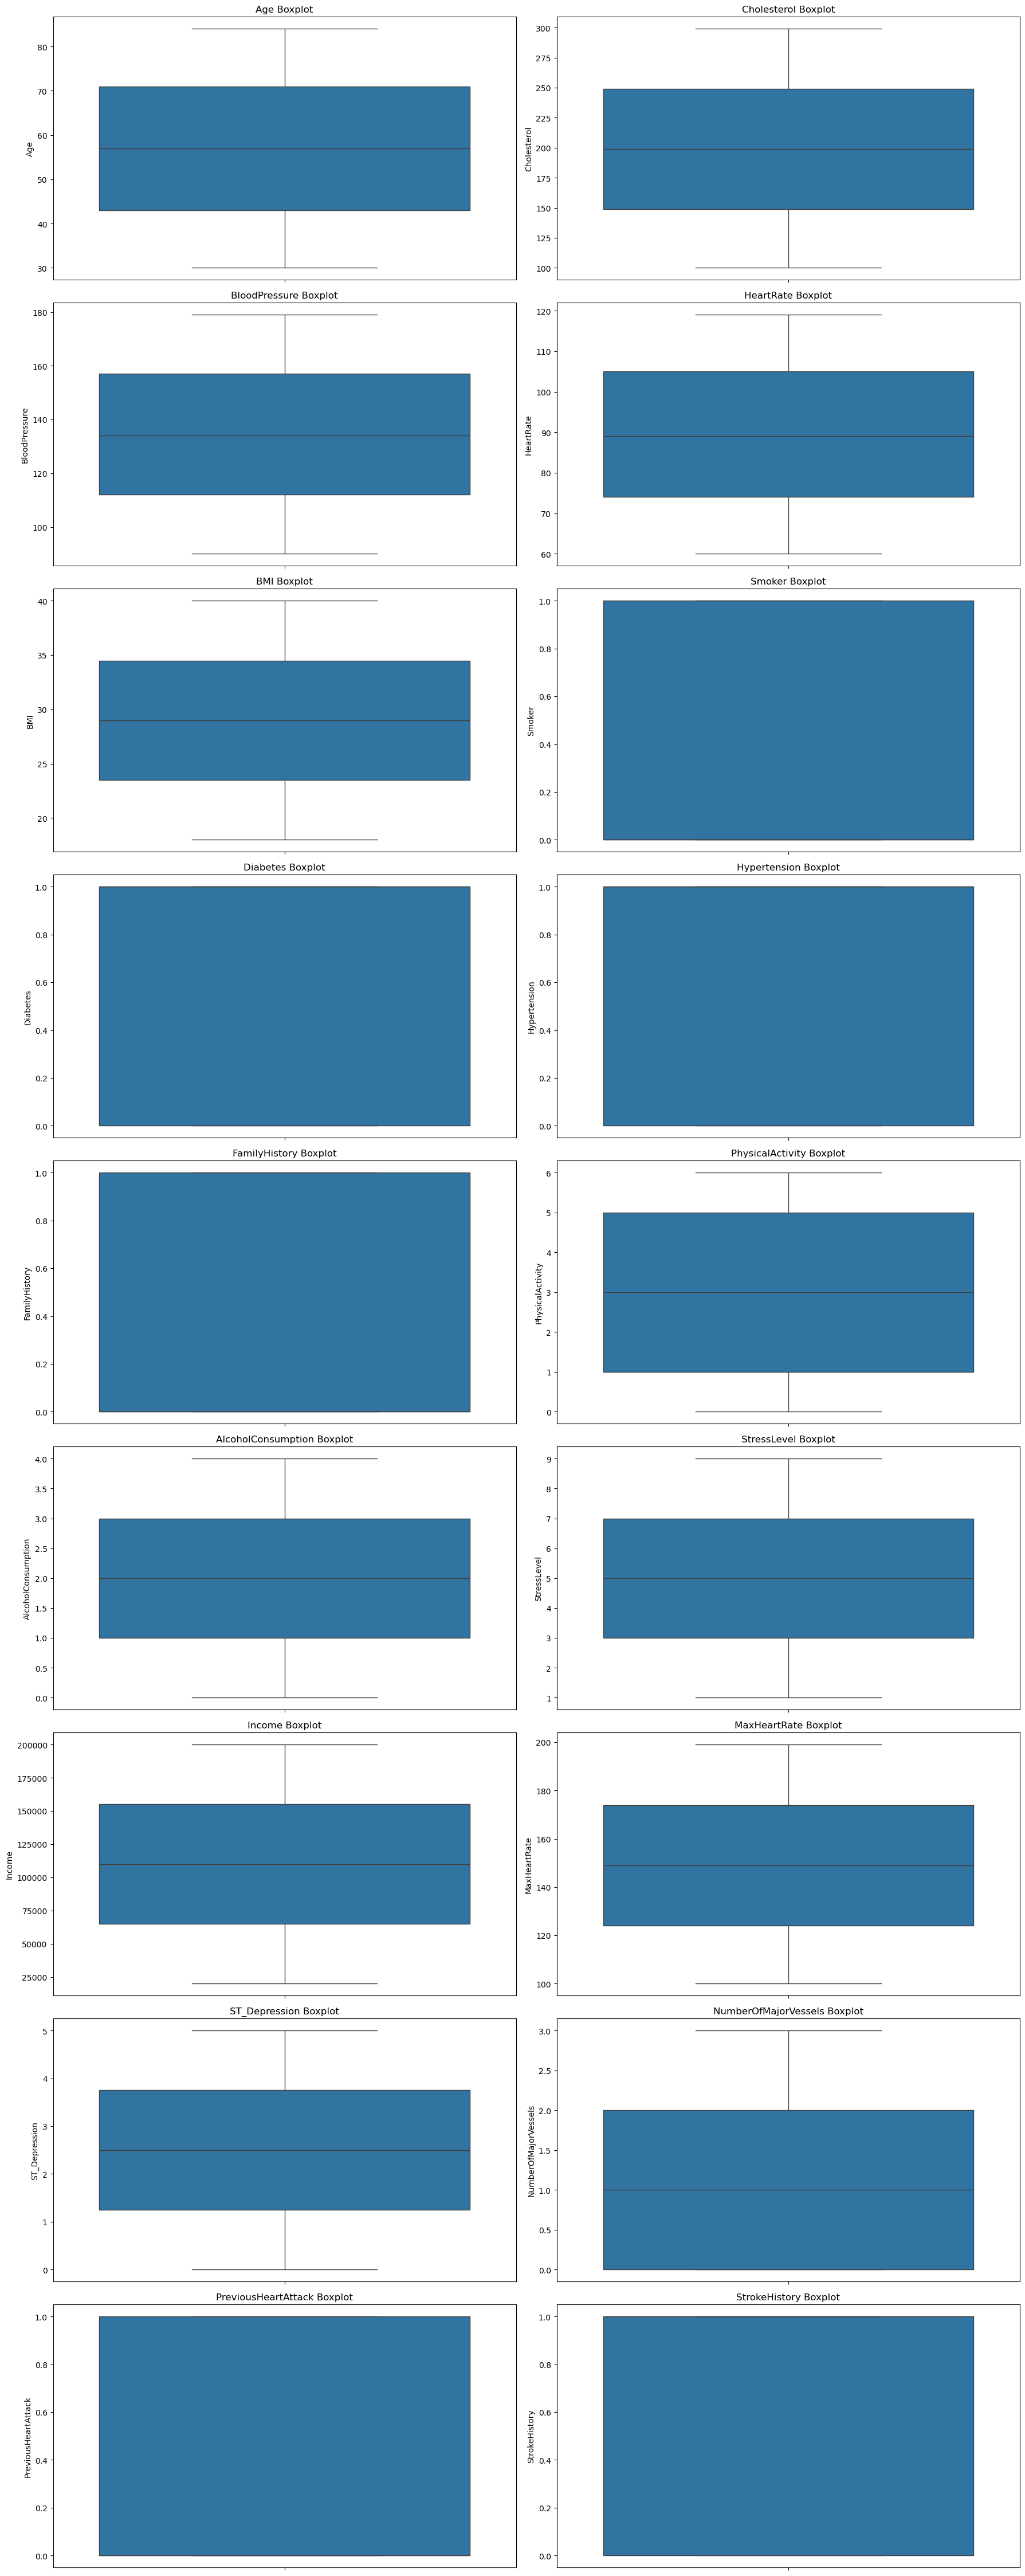

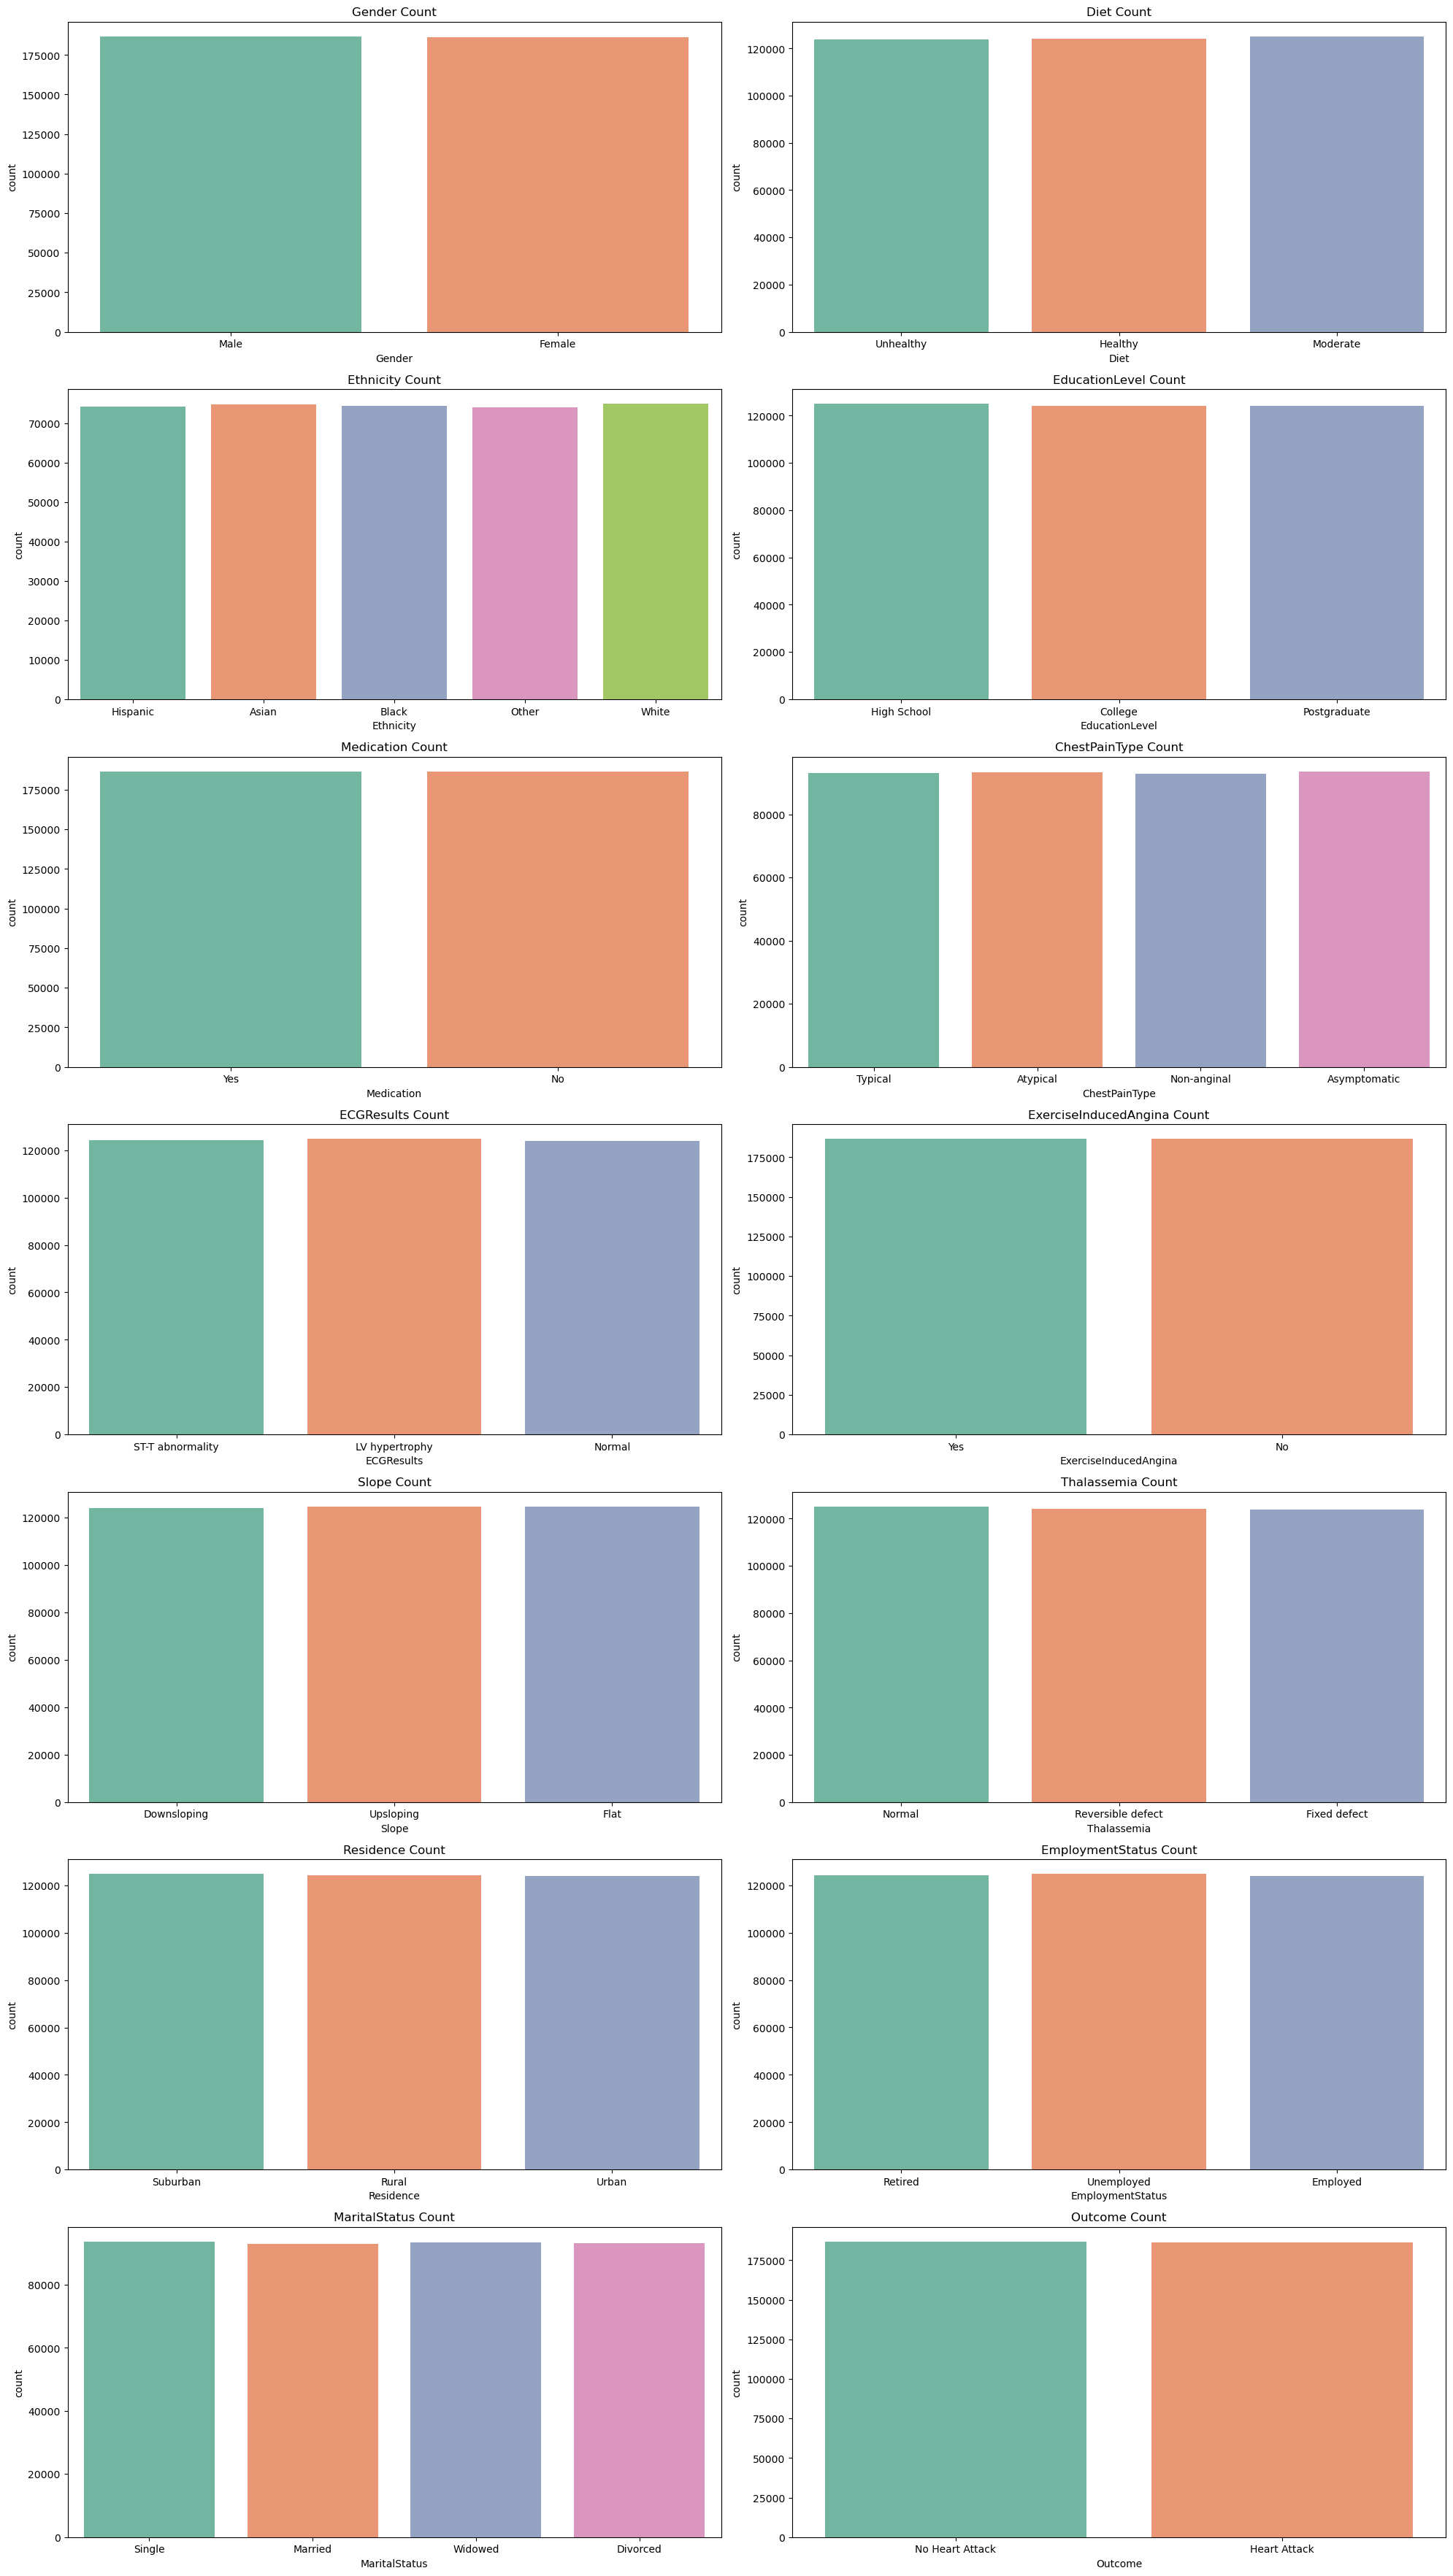

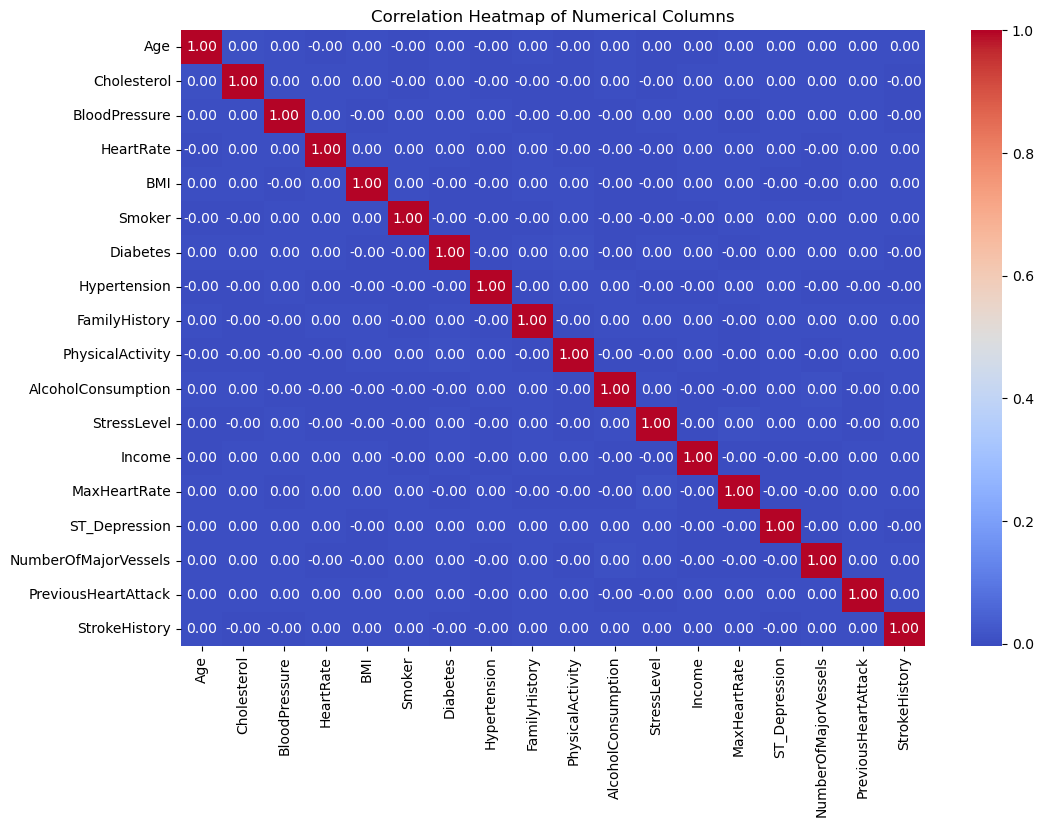

In [2]:
## **2. Đọc dữ liệu**
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler, LabelEncoder  

pd.set_option('display.max_colwidth', None)  
pd.set_option("display.max_columns", None)  
pd.set_option('display.max_rows', None)  

df = pd.read_csv('heart_attack_dataset.csv')
## **3. Khám phá và phân tích dữ liệu**

n_rows, n_cols = df.shape  
print("Kích thước bộ dữ liệu:")  
print(f'- Số lượng dòng (bản ghi): {n_rows}')  
print(f'- Số lượng cột (thuộc tính): {n_cols}')  
print("5 dòng đầu tiên của bộ dữ liệu:")
df.head()


duplicated_rows = df.duplicated().sum()  
print(f"Số lượng dòng bị trùng: {duplicated_rows}")  
# → Không có dòng nào bị trùng lặp


missing_values_sum = df.isnull().sum()  
print(f"Tổng dữ liệu thiếu ở mỗi cột:\n")  
print(missing_values_sum)  
# → Không có cột nào có dữ liệu thiếu

 
print('Kiểu dữ liệu hiện tại của mỗi cột: \n')  
print(df.dtypes)

df.describe()

numerical_cols = df.select_dtypes(include='number').columns  
print(numerical_cols)

categorical_cols = df.select_dtypes(exclude='number').columns  
print(categorical_cols)

num_numerical = len(numerical_cols)

fig, axes = plt.subplots(nrows=(num_numerical // 2) + 1, ncols=2, figsize=(18, 5 * ((num_numerical // 2) + 1)))
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'{col} Distribution')
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(nrows=(num_numerical // 2) + 1, ncols=2, figsize=(18, 5 * ((num_numerical // 2) + 1)))
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
    sns.boxplot(df[col], ax=axes[i])
    axes[i].set_title(f'{col} Boxplot')
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(nrows=(len(categorical_cols) // 2) + 1, ncols=2, figsize=(20, 5 * ((len(categorical_cols) // 2) + 1)))
axes = axes.flatten()
for i, col in enumerate(categorical_cols):
    sns.countplot(x=df[col], ax=axes[i], hue=df[col], palette='Set2', legend=False)
    axes[i].set_title(f'{col} Count')
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()


## 2. Tiền xử lí

In [3]:
# Xác định cột mục tiêu (target) dựa trên các lựa chọn phổ biến
if 'HeartAttack' in df.columns:
    target_column = 'HeartAttack'
elif 'HeartDisease' in df.columns:
    target_column = 'HeartDisease'
elif 'Outcome' in df.columns:
    target_column = 'Outcome'
else:
    raise ValueError("Không tìm thấy cột mục tiêu. Vui lòng kiểm tra tên cột của dataset.")

print(f"Đã chọn cột mục tiêu: {target_column}")

# Tách dữ liệu thành biến đầu vào (X) và biến mục tiêu (y)
X = df.drop(target_column, axis=1)
y = df[target_column]

# Encode các biến phân loại (nếu có)
categorical_cols_data = X.select_dtypes(include=['object']).columns
print("Các biến phân loại:", list(categorical_cols_data))
le = LabelEncoder()
for col in categorical_cols_data:
    X[col] = le.fit_transform(X[col])

# Chia tách dữ liệu thành tập huấn luyện (80%) và tập kiểm tra (20%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Kích thước tập huấn luyện:", X_train.shape)
print("Kích thước tập kiểm tra:", X_test.shape)

# Lấy các cột số từ X (đã loại bỏ cột mục tiêu) để chuẩn hóa
numerical_cols_proc = X.select_dtypes(include='number').columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[numerical_cols_proc] = scaler.fit_transform(X_train[numerical_cols_proc])
X_test[numerical_cols_proc] = scaler.transform(X_test[numerical_cols_proc])
print("Vài dòng dữ liệu sau chuẩn hóa:")
print(X_train.head())

Đã chọn cột mục tiêu: Outcome
Các biến phân loại: ['Gender', 'Diet', 'Ethnicity', 'EducationLevel', 'Medication', 'ChestPainType', 'ECGResults', 'ExerciseInducedAngina', 'Slope', 'Thalassemia', 'Residence', 'EmploymentStatus', 'MaritalStatus']
Kích thước tập huấn luyện: (298379, 31)
Kích thước tập kiểm tra: (74595, 31)
Vài dòng dữ liệu sau chuẩn hóa:
             Age    Gender  Cholesterol  BloodPressure  HeartRate       BMI  \
88550  -1.195797  0.997821    -1.410825       0.056983  -0.431809 -1.151160   
2106    0.190957  0.997821     0.598955      -0.596605   0.087224 -0.048035   
22981   0.253992 -1.002184     0.339070       0.595232  -1.239194  0.188349   
266995 -0.439386  0.997821     1.430588       1.594838   0.144894  1.275715   
182416  1.136472  0.997821    -1.584082       1.710177  -0.893172  1.181161   

          Smoker  Diabetes  Hypertension  FamilyHistory  PhysicalActivity  \
88550   1.001560  1.000593      -1.00209      -1.001345          0.998742   
2106   -0.998443 -

## 3. Trực quan hoá

### a. Đối với người từ 50 tuổi trở lên, những yếu tố nào có ảnh hưởng mạnh nhất đến nguy cơ đau tim và có sự khác biệt giữa hai giới tính hay không?

/var/folders/b4/dqvjht991812wpssc6sdmlj00000gn/T/ipykernel_41170/1682387944.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_all.values, y=corr_all.index, palette="viridis")


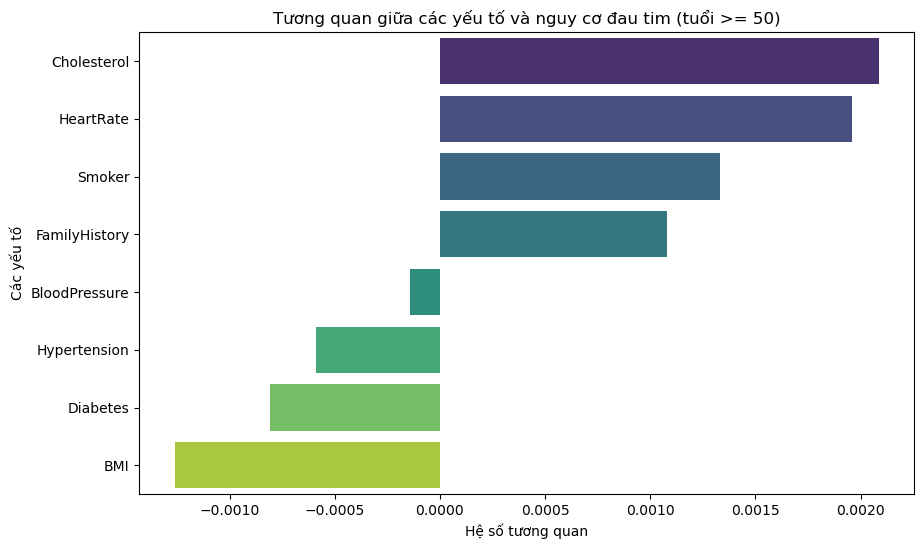

/var/folders/b4/dqvjht991812wpssc6sdmlj00000gn/T/ipykernel_41170/1682387944.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_gender.values, y=corr_gender.index, palette="viridis")


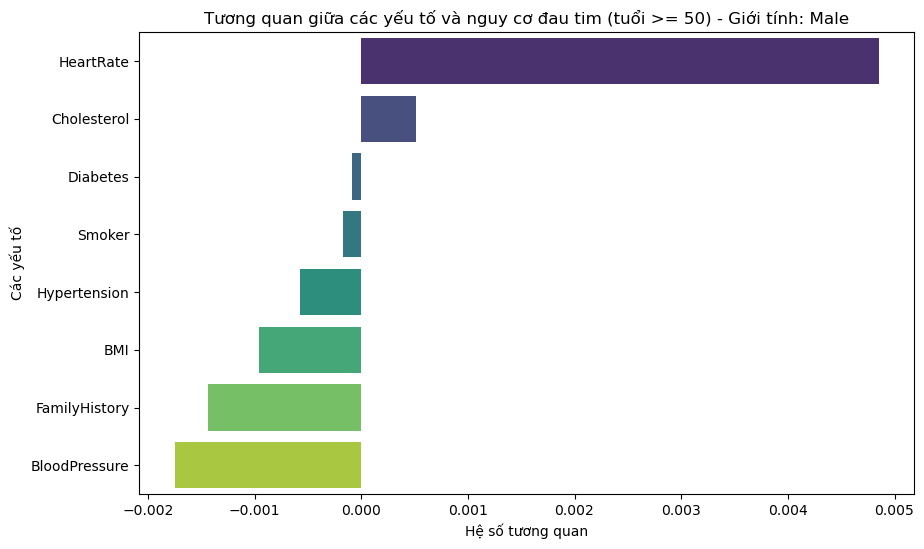

/var/folders/b4/dqvjht991812wpssc6sdmlj00000gn/T/ipykernel_41170/1682387944.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_gender.values, y=corr_gender.index, palette="viridis")


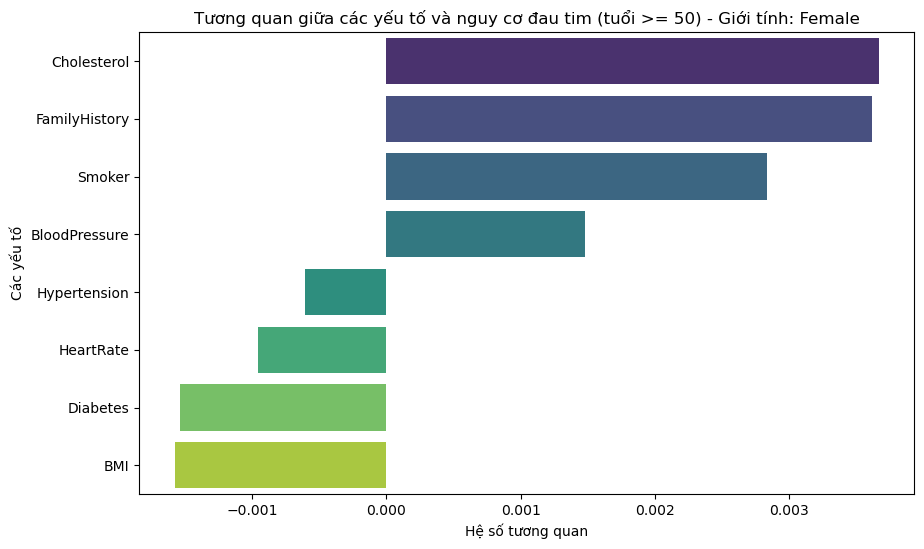

In [4]:
df_corr = df.copy()
if df_corr[target_column].dtype == 'object':  # Encode nếu cần
    df_corr[target_column] = LabelEncoder().fit_transform(df_corr[target_column])

df_50 = df_corr[df_corr['Age'] >= 50]
factors = ['Cholesterol', 'BloodPressure', 'HeartRate', 'BMI', 'Smoker', 'Diabetes', 'Hypertension', 'FamilyHistory']

# Tính hệ số tương quan trên toàn bộ nhóm tuổi >=50
corr_all = df_50[factors + [target_column]].corr()[target_column].drop(target_column)
corr_all = corr_all.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=corr_all.values, y=corr_all.index, palette="viridis")
plt.title('Tương quan giữa các yếu tố và nguy cơ đau tim (tuổi >= 50)')
plt.xlabel('Hệ số tương quan')
plt.ylabel('Các yếu tố')  # Nhãn trục y đã được cập nhật
plt.show()

# So sánh theo giới tính trong nhóm tuổi >=50
genders = df_50['Gender'].unique()
for gender in genders:
    df_gender = df_50[df_50['Gender'] == gender]
    corr_gender = df_gender[factors + [target_column]].corr()[target_column].drop(target_column)
    corr_gender = corr_gender.sort_values(ascending=False)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=corr_gender.values, y=corr_gender.index, palette="viridis")
    plt.title(f'Tương quan giữa các yếu tố và nguy cơ đau tim (tuổi >= 50) - Giới tính: {gender}')
    plt.xlabel('Hệ số tương quan')
    plt.ylabel('Các yếu tố')  # Nhãn trục y đã được cập nhật
    plt.show()

### b. Trong nhóm bệnh nhân bị đau tim tái phát, yếu tố nào gây ra nguy cơ tái phát cao nhất?

/var/folders/b4/dqvjht991812wpssc6sdmlj00000gn/T/ipykernel_41170/1609182356.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_recurrence.values, y=corr_recurrence.index, palette="viridis")


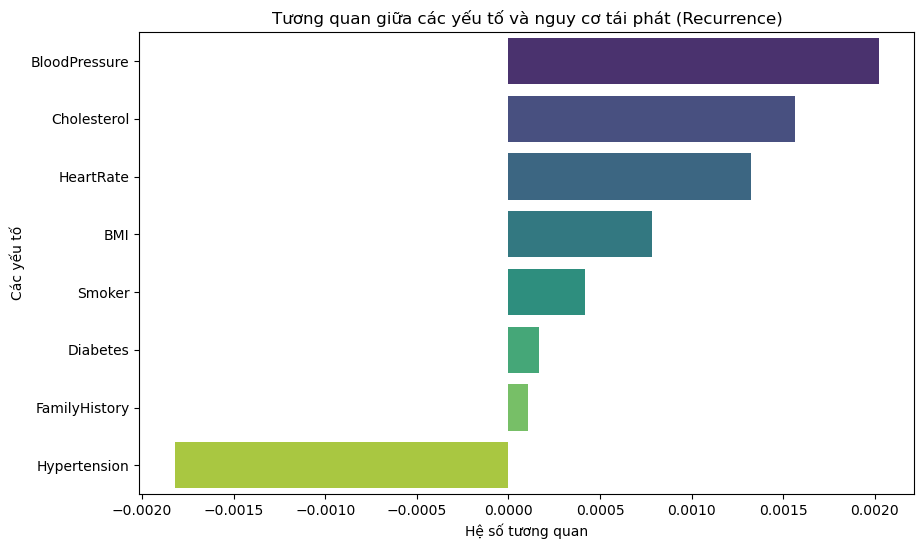

In [5]:
# Giả sử rằng nếu PreviousHeartAttack == 1 thì bệnh nhân có tái phát
df_corr["Recurrence"] = df_corr["PreviousHeartAttack"]

corr_recurrence = df_corr[factors + ["Recurrence"]].corr()["Recurrence"].drop("Recurrence")
corr_recurrence = corr_recurrence.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=corr_recurrence.values, y=corr_recurrence.index, palette="viridis")
plt.title('Tương quan giữa các yếu tố và nguy cơ tái phát (Recurrence)')
plt.xlabel('Hệ số tương quan')
plt.ylabel('Các yếu tố')  # Nhãn trục y đã được cập nhật
plt.show()

### c. Yếu tố bệnh mãn tính ảnh hưởng thế nào đến nguy cơ đau tim (cao huyết áp, tiểu đường,..)

/var/folders/b4/dqvjht991812wpssc6sdmlj00000gn/T/ipykernel_41170/4241384296.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_chronic.values, y=corr_chronic.index, palette="magma")


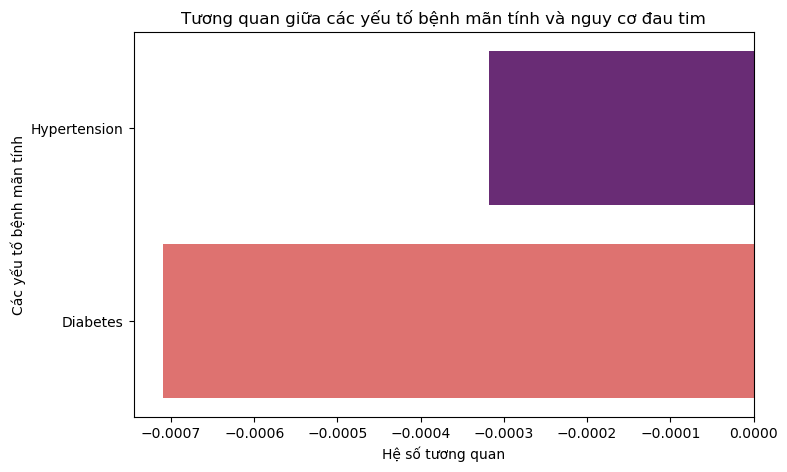

/var/folders/b4/dqvjht991812wpssc6sdmlj00000gn/T/ipykernel_41170/4241384296.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=factor, data=df_corr, palette="Set2")


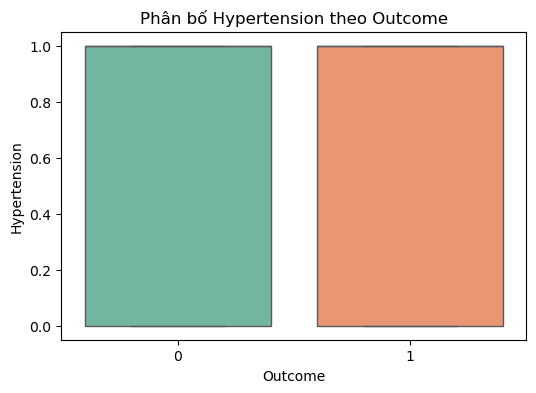

/var/folders/b4/dqvjht991812wpssc6sdmlj00000gn/T/ipykernel_41170/4241384296.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=factor, data=df_corr, palette="Set2")


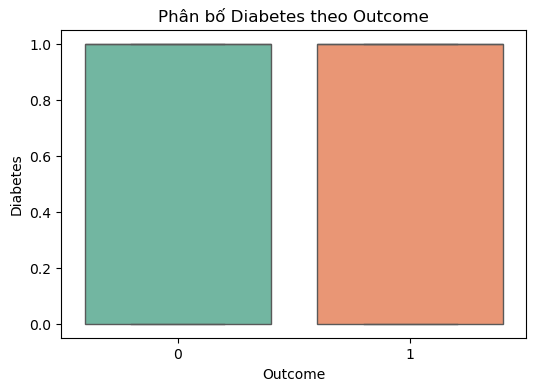

In [6]:
chronic_factors = ['Hypertension', 'Diabetes']

corr_chronic = df_corr[chronic_factors + [target_column]].corr()[target_column].drop(target_column)
corr_chronic = corr_chronic.sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=corr_chronic.values, y=corr_chronic.index, palette="magma")
plt.title('Tương quan giữa các yếu tố bệnh mãn tính và nguy cơ đau tim')
plt.xlabel('Hệ số tương quan')
plt.ylabel('Các yếu tố bệnh mãn tính')  # Nhãn trục y đã được cập nhật
plt.show()

# Hiển thị phân bố các biến bệnh mãn tính theo biến mục tiêu
for factor in chronic_factors:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=target_column, y=factor, data=df_corr, palette="Set2")
    plt.title(f'Phân bố {factor} theo {target_column}')
    plt.xlabel(target_column)
    plt.ylabel(factor)
    plt.show()